In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic, plot_loss
from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_6524\660180380.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def dataset_distr(y_train):
    values, counts = np.unique(y_train, return_counts=True)
    sum = np.sum(counts)
    return dict(zip(values, counts / sum))

# Load datasets

## Synthetic dataset

In [2]:
X_train_syn = pd.read_csv("datasets/synthetic/syn_X_train.csv").values
y_train_syn = pd.read_csv("datasets/synthetic/syn_y_train.csv").values.reshape(-1)
X_test_syn = pd.read_csv("datasets/synthetic/syn_X_test.csv").values
y_test_syn = pd.read_csv("datasets/synthetic/syn_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_syn.shape}, y_train = {y_train_syn.shape}
X_test = {X_test_syn.shape}, y_test = {y_test_syn.shape}""")


Apple quality dataset
X_train = (4000, 11), y_train = (4000,)
X_test = (1000, 11), y_test = (1000,)


In [19]:
benchSyn1 = LogisticRegression(C=1).fit(X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn2 = LogisticRegression(C=1, solver="Newton-CG").fit(X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn3 = LogisticRegression(C=1, solver="CG").fit(X_train_syn, y_train_syn, X_test_syn, y_test_syn)

benchSyn_data = optim_bench([benchSyn1, benchSyn2, benchSyn3])

## Apple quality dataset

In [3]:
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [4]:
CApple = 1

benchApple1 = LogisticRegression(C=1).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple2 = LogisticRegression(C=1, solver="Newton-CG").fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple3 = LogisticRegression(C=1, solver="CG").fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple)

benchApple_data = optim_bench([benchApple1, benchApple2, benchApple3])

## Cars purchaising dataset

In [43]:
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

print(f"""
Cars purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Cars purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [44]:
benchCar1 = LogisticRegression(C=1).fit(X_train_car, y_train_car, X_test_car, y_test_car)
benchCar2 = LogisticRegression(C=1, solver="Newton-CG").fit(X_train_car, y_train_car, X_test_car, y_test_car)
benchCar3 = LogisticRegression(C=1, solver="CG").fit(X_train_car, y_train_car, X_test_car, y_test_car)

benchCar_data = optim_bench([benchCar1, benchCar2, benchCar3])

## Loan eligibility dataset

In [4]:
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")


Loan eligibility dataset
X_train = (384, 12), y_train = (384,)
X_test = (96, 12), y_test = (96,)


In [16]:
CLoan = 1

benchLoan1 = LogisticRegression(C=CLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan2 = LogisticRegression(C=CLoan, solver="Newton-CG").fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan3 = LogisticRegression(C=CLoan, solver="CG").fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan)

benchLoan_data = optim_bench([benchLoan1, benchLoan2, benchLoan3])

## HR score dataset

In [6]:
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")


HR score dataset
X_train = (240, 10), y_train = (240,)
X_test = (60, 10), y_test = (60,)


In [27]:
CHR = 1

benchHR1 = LogisticRegression(C=CHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR2 = LogisticRegression(C=CHR, solver="Newton-CG").fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR3 = LogisticRegression(C=CHR, solver="CG").fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr)

benchHR_data = optim_bench([benchHR1, benchHR2, benchHR3])

## Bank churn dataset

In [50]:
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")


Bank churn dataset
X_train = (8000, 11)
X_test = (2000, 11)


In [51]:
CBank = 1

benchBank1 = LogisticRegression(C=CBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank2 = LogisticRegression(C=CBank, solver="Newton-CG").fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank3 = LogisticRegression(C=CBank, solver="CG").fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank)

benchBank_data = optim_bench([benchBank1, benchBank2, benchBank3])

## Breast cancer dataset

In [80]:
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [81]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [82]:
benchBreast1 = LogisticRegression(C=1).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast3 = LogisticRegression(C=1, solver="CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)

benchBreast_data = optim_bench([benchBreast1, benchBreast2, benchBreast3])

## Heart attack dataset

In [7]:
X_train_heart = pd.read_csv("datasets/heart_attack/heart_X_train.csv").values
y_train_heart = pd.read_csv("datasets/heart_attack/heart_y_train.csv").values.reshape(-1)
X_test_heart = pd.read_csv("datasets/heart_attack/heart_X_test.csv").values
y_test_heart = pd.read_csv("datasets/heart_attack/heart_y_test.csv").values.reshape(-1)

print(f"""
Heart attack dataset
X_train = {X_train_heart.shape}, y_train = {y_train_heart.shape}
CHeartX_test = {X_test_heart.shape}, y_test = {y_test_heart.shape}""")


Heart attack dataset
X_train = (241, 14), y_train = (241,)
X_test = (61, 14), y_test = (61,)


In [38]:
CHeart = 1

benchHeart1 = LogisticRegression(C=CHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart2 = LogisticRegression(C=CHeart, solver="Newton-CG").fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart3 = LogisticRegression(C=CHeart, solver="CG").fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart)

benchHeart_data = optim_bench([benchHeart1, benchHeart2, benchHeart3])

## Diabetes dataset

In [84]:
X_train_diab = pd.read_csv("datasets/diabetes/diab_X_train.csv").values
y_train_diab = pd.read_csv("datasets/diabetes/diab_y_train.csv").values.reshape(-1)
X_test_diab = pd.read_csv("datasets/diabetes/diab_X_test.csv").values
y_test_diab = pd.read_csv("datasets/diabetes/diab_y_test.csv").values.reshape(-1)

print(f"""
Diabetes dataset
X_train = {X_train_diab.shape}, y_train = {y_train_diab.shape}
X_test = {X_test_diab.shape}, y_test = {y_test_diab.shape}""")


Diabetes dataset
X_train = (595, 9), y_train = (595,)
X_test = (149, 9), y_test = (149,)


In [85]:
CDiab = 1

benchDiab1 = LogisticRegression(C=CDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab2 = LogisticRegression(C=CDiab, solver="Newton-CG").fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab3 = LogisticRegression(C=CDiab, solver="CG").fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab)

benchDiab_data = optim_bench([benchDiab1, benchDiab2, benchDiab3])

# Synthetic dataset

In [5]:
sgdSyn_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.05)
sgdSyn_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01)

In [6]:
sgdSyn_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [7]:
sgdmSyn1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
sgdmSyn2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.05, momentum=0.9)
sgdmSyn3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01, momentum=0.9)

In [9]:
sgdSyn_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [10]:
mslcSyn1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslcSyn2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
mslcSyn3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [11]:
mslrSyn1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslrSyn2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5, momentum=0.9)
mslrSyn3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [12]:
modelsSyn_data = optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_fixed3, sgdSyn_decre1, sgdSyn_decre2, sgdSyn_decre3, sgdmSyn1, sgdmSyn2, sgdmSyn3,
                             sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3, mslcSyn1, mslcSyn2, mslcSyn3, mslrSyn1, mslrSyn2, mslrSyn3])

## Summary

In [20]:
models_summary(modelsSyn_data, benchSyn_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,1339.457931,0.000010,NaN,30,0.86225,0.882,0.009369
1,Newton-CG,1,NaN,NaN,NaN,1339.457931,0.005946,NaN,11,0.86225,0.882,0.009562
0,L-BFGS,1,NaN,NaN,NaN,1339.457982,0.079935,NaN,15,0.86225,0.882,0.000000
18,MSL-SGDM-R,1,32.0,1.00,0.9,1964.594290,1197.705367,20.721274,200,0.84900,0.867,1.515352
14,SGD-Armijo,1,32.0,0.10,0.0,1966.378627,1200.362563,20.194782,200,0.84925,0.868,1.516993
12,SGD-Armijo,1,32.0,1.00,0.0,1999.725487,1253.762850,20.577526,200,0.84675,0.856,1.516284
15,MSL-SGDM-C,1,32.0,1.00,0.9,2012.474998,1276.711375,20.691535,200,0.85950,0.882,1.529169
20,MSL-SGDM-R,1,32.0,0.10,0.9,2014.137212,1272.577429,20.422125,200,0.84325,0.848,1.567308
17,MSL-SGDM-C,1,32.0,0.10,0.9,2014.188838,1272.662598,20.427378,200,0.84325,0.849,1.567250
19,MSL-SGDM-R,1,32.0,0.50,0.9,2017.572747,1284.808481,20.558255,200,0.85825,0.880,1.536348


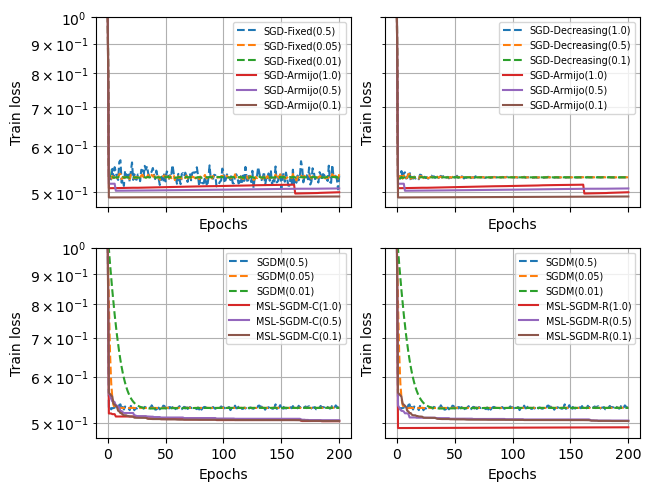

In [14]:
diagnostic(optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_fixed3, sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3]),
          optim_data([sgdSyn_decre1, sgdSyn_decre2, sgdSyn_decre3, sgdSyn_armijo1, sgdSyn_armijo2, sgdSyn_armijo3]),
          optim_data([sgdmSyn1, sgdmSyn2, sgdmSyn3, mslcSyn1, mslcSyn2, mslcSyn3]),
          optim_data([sgdmSyn1, sgdmSyn2, sgdmSyn3, mslrSyn1, mslrSyn2, mslrSyn3]))

# Apple quality dataset

In [5]:
MApple = 16
kApple = 200
print(X_train_apple.shape)
print(np.unique(y_train_apple, return_counts=True))
print(dataset_distr(y_train_apple))

(3200, 8)
(array([-1,  1], dtype=int64), array([1595, 1605], dtype=int64))
{-1: 0.4984375, 1: 0.5015625}


In [6]:
# SGD-Fixed
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [7]:
# SGD-Decreasing
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [8]:
# SGDM
sgdmApple1 = LogisticRegression(solver="SGDM", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdmApple2 = LogisticRegression(solver="SGDM", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdmApple3 = LogisticRegression(solver="SGDM", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [9]:
# SGD-Armijo
sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [10]:
# MSL-SGDM-C
mslcApple1 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple2 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslcApple3 = LogisticRegression(solver="MSL-SGDM-C", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

KeyboardInterrupt: 

In [ ]:
# MSL-SGDM-R
mslrApple1 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple2 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslrApple3 = LogisticRegression(solver="MSL-SGDM-R", C=CApple, minibatch=MApple).fit(X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [ ]:
modelsApple_data = optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdmApple1, sgdmApple2, sgdmApple3,
                               sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3, mslcApple1, mslcApple2, mslcApple3, mslrApple1, mslrApple2, mslrApple3])
#modelsApple_data[["Solver", "Step-size", "Loss"]].sort_values(by="Loss")

## Summary

In [ ]:
models_summary(modelsApple_data, benchApple_data).sort_values(by="Loss")

In [ ]:
diagnostic(optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslcApple1, mslcApple2, mslcApple3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslrApple1, mslrApple2, mslrApple3]),
           benchApple1)

# Cars purchaising dataset

In [45]:
CCar = 1
MCar = 16
X_train_car.shape

(754, 4)

In [46]:
# SGD-Fixed
sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [47]:
# SGD-Decreasing
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [48]:
# SGDM
sgdmCar_1 = LogisticRegression(solver="SGDM", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
sgdmCar_3 = LogisticRegression(solver="SGDM", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [49]:
# SGD-Armijo
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [50]:
# MSL-SGDM-C
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\solvers_utils.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\solvers_utils.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\solvers_utils.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [51]:
# MSL-SGDM-R
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=CCar, minibatch=MCar, epochs=200).fit(X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [52]:
modelsCar_data = optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_fixed3, sgdCar_decre1, sgdCar_decre2, sgdCar_decre3, sgdmCar_1, sgdmCar_2, sgdmCar_3,
                             sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3, mslcCar_1, mslcCar_2, mslcCar_3, mslrCar_1, mslrCar_2, mslrCar_3])
#modelsCar_data[["Solver", "Loss"]].sort_values(by="Loss")

## Summary

In [53]:
models_summary(modelsCar_data, benchCar_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
1,Newton-CG,1,NaN,NaN,NaN,2.831682e+02,6.583311e-06,NaN,9,0.826260,0.830688,0.000000e+00
2,CG,1,NaN,NaN,NaN,2.831682e+02,2.901965e-06,NaN,13,0.826260,0.830688,0.000000e+00
0,L-BFGS,1,NaN,NaN,NaN,2.831682e+02,1.958761e-05,NaN,9,0.826260,0.830688,0.000000e+00
14,SGD-Armijo,1,16.0,0.01,0.0,4.210629e+02,1.856809e+02,1.874588,200,0.765252,0.767196,2.142249e+00
13,SGD-Armijo,1,16.0,0.10,0.0,4.246095e+02,1.886162e+02,1.975285,200,0.811671,0.804233,2.181330e+00
20,MSL-SGDM-R,1,16.0,0.01,0.9,4.285660e+02,1.954785e+02,1.748259,200,0.679045,0.682540,2.080561e+00
19,MSL-SGDM-R,1,16.0,0.10,0.9,4.294748e+02,1.957353e+02,1.830179,200,0.690981,0.687831,2.123107e+00
12,SGD-Armijo,1,16.0,1.00,0.0,4.308350e+02,1.949029e+02,2.051647,200,0.814324,0.793651,2.219883e+00
15,MSL-SGDM-C,1,16.0,1.00,0.9,4.468087e+02,2.093090e+02,1.968241,200,0.830239,0.793651,2.305075e+00
4,SGD-Fixed,1,16.0,0.10,0.0,4.487572e+02,2.122943e+02,0.134233,200,0.830239,0.825397,2.307623e+00


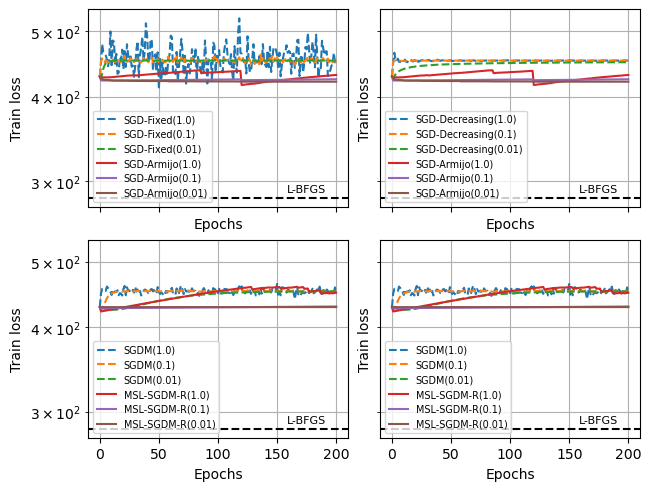

In [56]:
diagnostic(optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_fixed3, sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3]),
           optim_data([sgdCar_decre1, sgdCar_decre2, sgdCar_decre3, sgdCar_armijo1, sgdCar_armijo2, sgdCar_armijo3]),
           #optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3, mslcCar_1, mslcCar_2, mslcCar_3]),
           optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3, mslrCar_1, mslrCar_2, mslrCar_3]),
           optim_data([sgdmCar_1, sgdmCar_2, sgdmCar_3, mslrCar_1, mslrCar_2, mslrCar_3]),
           benchCar1)

# Loan eligibility dataset

In [8]:
MLoan = 4
kLoan = 200
print(X_train_loan.shape)
#print(dataset_distr(y_train_loan))

(384, 12)


In [9]:
# SGD-Fixed
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.2)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [10]:
# SGD-Decreasing
sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [11]:
# SGDM
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [12]:
# SGD-Armijo
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [13]:
# MSL-SGDM-C
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [14]:
# MSL-SGDM-R
mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=CLoan, minibatch=MLoan, epochs=kLoan).fit(X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [15]:
modelsLoan_data = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3, sgdmLoan_1, sgdmLoan_2, sgdmLoan_3,
                              sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3, mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

## Summary

In [17]:
models_summary(modelsLoan_data, benchLoan_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.653326,0.000010,NaN,5,0.807292,0.822917,0.000000,0.251945
0,L-BFGS,1,NaN,NaN,NaN,0.653326,0.000006,NaN,6,0.807292,0.822917,0.000000,0.251945
2,CG,1,NaN,NaN,NaN,0.653326,0.000009,NaN,6,0.807292,0.822917,0.000000,0.251945
7,SGD-Decreasing,1,4.0,0.10,0.0,0.653326,0.000301,0.277421,200,0.807292,0.822917,0.000224,0.252044
14,SGD-Armijo,1,4.0,0.01,0.0,0.653326,0.001039,2.164131,200,0.807292,0.822917,0.000860,0.251671
11,SGDM,1,4.0,0.01,0.9,0.653330,0.003285,0.279535,200,0.807292,0.822917,0.002498,0.252265
13,SGD-Armijo,1,4.0,0.10,0.0,0.653330,0.003120,2.252135,200,0.807292,0.822917,0.002569,0.251781
8,SGD-Decreasing,1,4.0,0.01,0.0,0.653330,0.003228,0.283440,200,0.804688,0.822917,0.002811,0.252083
6,SGD-Decreasing,1,4.0,1.00,0.0,0.653363,0.009942,0.284874,200,0.807292,0.822917,0.007459,0.252133
18,MSL-SGDM-R,1,4.0,1.00,0.9,0.653470,0.018895,2.233188,200,0.804688,0.822917,0.015229,0.247987


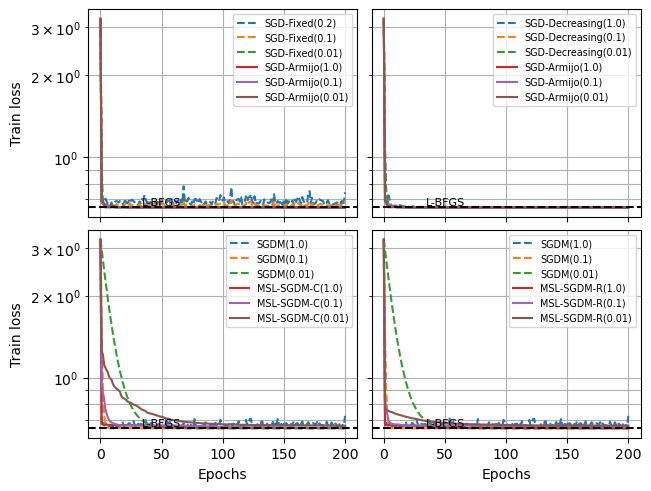

In [18]:
diagnostic(optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3]),
           optim_data([sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3, sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3]),
           optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3, mslcLoan1, mslcLoan2, mslcLoan3]),
           optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3, mslrLoan1, mslrLoan2, mslrLoan3]),
           benchLoan1)

# HR score dataset

In [19]:
MHR = 8
kHR = 200
print(X_train_hr.shape)
print(dataset_distr(y_train_hr))

(240, 10)
{-1: 0.45, 1: 0.55}


In [20]:
# SGD-Fixed
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.2)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.05)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [21]:
# SGD-Decreasing
sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [22]:
# SGDM
sgdmHR1 = LogisticRegression(solver="SGDM", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.001, momentum=0.9)

In [23]:
# SGD-Armijo
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [24]:
# MSL-SGDM-C
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [25]:
# MSL-SGDM-R
mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=CHR, minibatch=MHR, epochs=kHR).fit(X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [26]:
modelsHR_data = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3, sgdmHR1, sgdmHR2, sgdmHR3,
                           sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3, mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

## Summary

In [28]:
models_summary(modelsHR_data, benchHR_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492460,0.000043,NaN,5,0.887500,0.850000,0.000000,0.419522
0,L-BFGS,1,NaN,NaN,NaN,0.492460,0.000007,NaN,7,0.887500,0.850000,0.000000,0.419522
2,CG,1,NaN,NaN,NaN,0.492460,0.000009,NaN,7,0.887500,0.850000,0.000000,0.419522
7,SGD-Decreasing,1,8.0,0.100,0.0,0.492460,0.000048,0.094358,200,0.887500,0.850000,0.000100,0.419496
13,SGD-Armijo,1,8.0,0.100,0.0,0.492460,0.000755,1.103944,200,0.887500,0.850000,0.000721,0.419513
6,SGD-Decreasing,1,8.0,1.000,0.0,0.492461,0.001818,0.101719,200,0.887500,0.850000,0.001005,0.418835
14,SGD-Armijo,1,8.0,0.010,0.0,0.492462,0.002233,1.050503,200,0.887500,0.850000,0.002249,0.419765
5,SGD-Fixed,1,8.0,0.010,0.0,0.492466,0.004950,0.095050,200,0.887500,0.850000,0.002753,0.417434
12,SGD-Armijo,1,8.0,1.000,0.0,0.492471,0.005179,1.162671,200,0.887500,0.850000,0.004624,0.420488
16,MSL-SGDM-C,1,8.0,0.100,0.9,0.492479,0.006432,1.118047,200,0.887500,0.850000,0.005981,0.418294


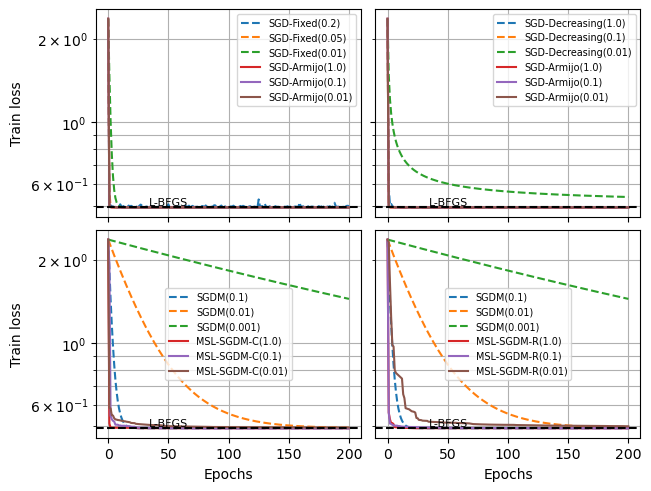

In [29]:
diagnostic(optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3]),
           optim_data([sgdHR_decre1, sgdHR_decre2, sgdHR_decre3, sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3]),
           optim_data([sgdmHR1, sgdmHR2, sgdmHR3, mslcHR1, mslcHR2, mslcHR3]),
           optim_data([sgdmHR1, sgdmHR2, sgdmHR3, mslrHR1, mslrHR2, mslrHR3]),
           benchHR1)

# Bank churn dataset

In [62]:
MBank = 32
print(X_train_bank.shape)
print(dataset_distr(y_train_bank))

(8000, 11)
{-1: 0.7945, 1: 0.2055}


In [63]:
# SGD-Fixed
sgdBank_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

In [64]:
# SGD-Decreasing
sgdBank_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

In [65]:
# SGDM
sgdmBank1 = LogisticRegression(solver="SGDM", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
sgdmBank2 = LogisticRegression(solver="SGDM", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)
sgdmBank3 = LogisticRegression(solver="SGDM", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01, momentum=0.9)

In [66]:
# SGD-Armijo
sgdBank_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

In [67]:
# MSL-SGDM-C
mslcBank1 = LogisticRegression(solver="MSL-SGDM-C", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslcBank2 = LogisticRegression(solver="MSL-SGDM-C", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)
mslcBank3 = LogisticRegression(solver="MSL-SGDM-C", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01, momentum=0.9)

In [68]:
# MSL-SGDM-R
mslrBank1 = LogisticRegression(solver="MSL-SGDM-R", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslrBank2 = LogisticRegression(solver="MSL-SGDM-R", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)
mslrBank3 = LogisticRegression(solver="MSL-SGDM-R", C=CBank, minibatch=MBank).fit(X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01, momentum=0.9)

In [69]:
modelsBank_data = optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdmBank1, sgdmBank2, sgdmBank3,
                              sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3, mslcBank1, mslcBank2, mslcBank3, mslrBank1, mslrBank2, mslrBank3])

## Summary

In [70]:
models_summary(modelsBank_data, benchBank_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS)
2,CG,1.0,NaN,NaN,NaN,3504.987491,0.000004,NaN,15,0.807250,0.8155,0.000100
1,Newton-CG,1.0,NaN,NaN,NaN,3504.987491,0.026381,NaN,11,0.807250,0.8155,0.000100
0,L-BFGS,1.0,NaN,NaN,NaN,3504.987491,0.010745,NaN,11,0.807250,0.8150,0.000000
12,SGD-Armijo,0.2,32.0,1.00,0.0,3860.597418,890.658650,42.544088,200,0.799500,0.8070,0.932441
13,SGD-Armijo,0.2,32.0,0.10,0.0,3912.286104,959.598141,41.134331,200,0.798000,0.8040,0.995284
3,SGD-Fixed,0.2,32.0,1.00,0.0,4009.131255,1098.773722,0.872627,200,0.791250,0.7995,1.089649
14,SGD-Armijo,0.2,32.0,0.01,0.0,4022.165101,1123.619743,40.085203,200,0.801375,0.8035,1.093236
18,MSL-SGDM-R,0.2,32.0,1.00,0.9,4026.711984,1124.349678,41.065545,200,0.793250,0.8020,1.103419
7,SGD-Decreasing,0.2,32.0,0.10,0.0,4093.073857,1220.870432,0.894673,200,0.800750,0.8030,1.150069
11,SGDM,0.2,32.0,0.01,0.9,4093.139518,1220.885912,0.950481,200,0.800750,0.8030,1.150211


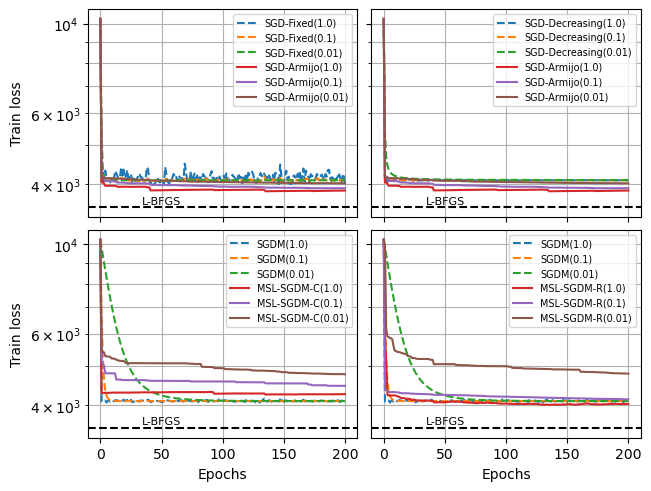

In [71]:
diagnostic(optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslcBank1, mslcBank2, mslcBank3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslrBank1, mslrBank2, mslrBank3]),
           benchBank1)

# Breast cancer dataset

In [13]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)

In [8]:
# SGDM
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [7]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5)
sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05)

In [9]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.5, momentum=0.9)
mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.05, momentum=0.9)

In [14]:
modelsBreast_data = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdmBreast_1, sgdmBreast_2, sgdmBreast_3,
                                sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3, mslcBreast_1, mslcBreast_2, mslcBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3])

## Summary

In [15]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,206.612101,0.000019,NaN,29,0.362637,0.412281,0.043966
1,Newton-CG,1,NaN,NaN,NaN,206.612102,0.001591,NaN,84,0.362637,0.412281,0.043543
0,L-BFGS,1,NaN,NaN,NaN,206.613346,0.066685,NaN,12,0.362637,0.412281,0.000000
13,SGD-Armijo,1,16.0,0.50,0.0,242.227708,77.738970,2.311771,200,0.347253,0.385965,2.333683
15,MSL-SGDM-C,1,16.0,1.00,0.9,242.501284,84.076377,2.266121,200,0.347253,0.394737,2.289303
16,MSL-SGDM-C,1,16.0,0.50,0.9,243.105176,87.823931,2.239408,200,0.351648,0.394737,2.285228
19,MSL-SGDM-R,1,16.0,0.50,0.9,243.229372,85.160753,2.238035,200,0.347253,0.394737,2.309897
18,MSL-SGDM-R,1,16.0,1.00,0.9,244.078685,88.899613,2.249558,200,0.356044,0.403509,2.286381
14,SGD-Armijo,1,16.0,0.05,0.0,244.393508,89.581395,2.188362,200,0.349451,0.394737,2.295707
17,MSL-SGDM-C,1,16.0,0.05,0.9,244.872252,90.154377,2.217371,200,0.342857,0.377193,2.398898


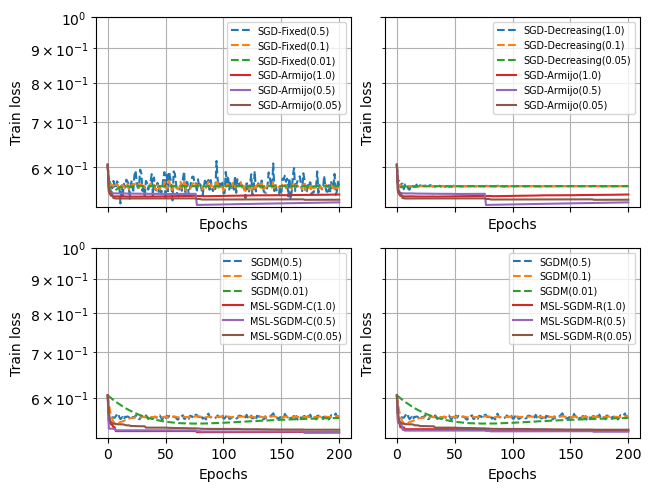

In [16]:
diagnostic(optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslcBreast_1, mslcBreast_2, mslcBreast_3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3]))

# Heart attack dataset

In [30]:
MHeart = 8
kHeart = 200
print(X_train_heart.shape)
print(dataset_distr(y_train_heart))

(241, 14)
{-1: 0.45228215767634855, 1: 0.5477178423236515}


In [31]:
# SGD-fixed
sgdHeart_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.5)
sgdHeart_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01)

In [32]:
# SGD-Decreasing
sgdHeart_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01)

In [33]:
# SGDM
sgdmHeart1 = LogisticRegression(solver="SGDM", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
sgdmHeart2 = LogisticRegression(solver="SGDM", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
sgdmHeart3 = LogisticRegression(solver="SGDM", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01, momentum=0.9)

In [34]:
# SGD-Armijo
sgdHeart_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)
sgdHeart_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01)

In [35]:
# MSL-SGDM-C
mslcHeart1 = LogisticRegression(solver="MSL-SGDM-C", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslcHeart2 = LogisticRegression(solver="MSL-SGDM-C", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
mslcHeart3 = LogisticRegression(solver="MSL-SGDM-C", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01, momentum=0.9)

In [36]:
# MSL-SGDM-C
mslrHeart1 = LogisticRegression(solver="MSL-SGDM-R", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslrHeart2 = LogisticRegression(solver="MSL-SGDM-R", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)
mslrHeart3 = LogisticRegression(solver="MSL-SGDM-R", C=CHeart, minibatch=MHeart, epochs=kHeart).fit(X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.01, momentum=0.9)

In [37]:
modelsHeart_data = optim_data([sgdHeart_fixed1, sgdHeart_fixed2, sgdHeart_fixed3, sgdHeart_decre1, sgdHeart_decre2, sgdHeart_decre3, sgdmHeart1, sgdmHeart2, sgdmHeart3,
                               sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3, mslcHeart1, mslcHeart2, mslcHeart3, mslrHeart1, mslrHeart2, mslrHeart3])

## Summary

In [39]:
models_summary(modelsHeart_data, benchHeart_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.596249,0.000028,NaN,5,0.846473,0.852459,0.000000,0.350596
2,CG,1,NaN,NaN,NaN,0.596249,0.000006,NaN,6,0.846473,0.852459,0.000000,0.350596
0,L-BFGS,1,NaN,NaN,NaN,0.596249,0.000010,NaN,6,0.846473,0.852459,0.000000,0.350596
7,SGD-Decreasing,1,8.0,0.10,0.0,0.596249,0.000225,0.097515,200,0.846473,0.852459,0.000200,0.350569
14,SGD-Armijo,1,8.0,0.01,0.0,0.596249,0.000719,1.101006,200,0.846473,0.852459,0.000600,0.350581
13,SGD-Armijo,1,8.0,0.10,0.0,0.596249,0.001127,1.211444,200,0.846473,0.852459,0.000975,0.350621
6,SGD-Decreasing,1,8.0,1.00,0.0,0.596249,0.001452,0.099320,200,0.846473,0.852459,0.001063,0.350877
5,SGD-Fixed,1,8.0,0.01,0.0,0.596253,0.003298,0.093561,200,0.846473,0.852459,0.002396,0.351024
18,MSL-SGDM-R,1,8.0,1.00,0.9,0.596260,0.005397,1.133798,200,0.846473,0.852459,0.004211,0.349632
12,SGD-Armijo,1,8.0,1.00,0.0,0.596294,0.010538,1.233197,200,0.850622,0.852459,0.008738,0.350746


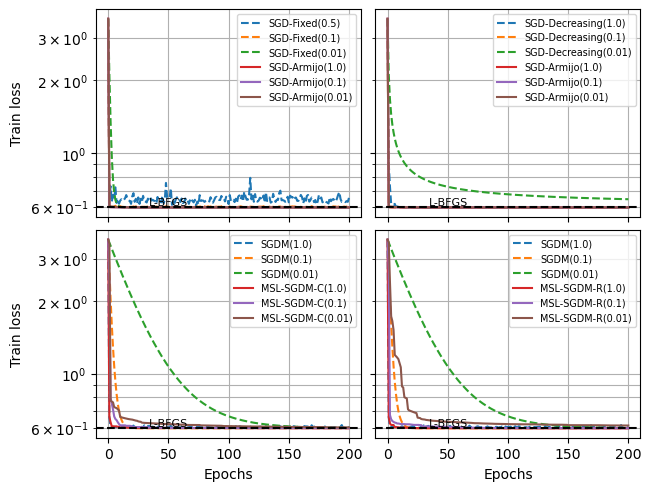

In [40]:
diagnostic(optim_data([sgdHeart_fixed1, sgdHeart_fixed2, sgdHeart_fixed3, sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3]),
           optim_data([sgdHeart_decre1, sgdHeart_decre2, sgdHeart_decre3, sgdHeart_armijo1, sgdHeart_armijo2, sgdHeart_armijo3]),
           optim_data([sgdmHeart1, sgdmHeart2, sgdmHeart3, mslcHeart1, mslcHeart2, mslcHeart3]),
           optim_data([sgdmHeart1, sgdmHeart2, sgdmHeart3, mslrHeart1, mslrHeart2, mslrHeart3]),
           benchHeart1)

# Diabetes dataset

In [86]:
MDiab = 8
kDiab = 200
print(X_train_diab.shape)
print(dataset_distr(y_train_diab))

(595, 9)
{-1: 0.6521008403361345, 1: 0.34789915966386553}


In [87]:
# SGD-Fixed
sgdDiab_fixed1 = LogisticRegression(solver="SGD-Fixed", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.2)
sgdDiab_fixed2 = LogisticRegression(solver="SGD-Fixed", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01)
sgdDiab_fixed3 = LogisticRegression(solver="SGD-Fixed", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.001)

In [88]:
# SGD-Decreasing
sgdDiab_decre1 = LogisticRegression(solver="SGD-Decreasing", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_decre2 = LogisticRegression(solver="SGD-Decreasing", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)
sgdDiab_decre3 = LogisticRegression(solver="SGD-Decreasing", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01)

In [89]:
# SGDM
sgdmDiab1 = LogisticRegression(solver="SGDM", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
sgdmDiab2 = LogisticRegression(solver="SGDM", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
sgdmDiab3 = LogisticRegression(solver="SGDM", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01, momentum=0.9)

In [90]:
# SGD-Armijo
sgdDiab_armijo1 = LogisticRegression(solver="SGD-Armijo", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_armijo2 = LogisticRegression(solver="SGD-Armijo", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)
sgdDiab_armijo3 = LogisticRegression(solver="SGD-Armijo", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01)

In [91]:
# MSL-SGDM-C
mslcDiab1 = LogisticRegression(solver="MSL-SGDM-C", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslcDiab2 = LogisticRegression(solver="MSL-SGDM-C", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
mslcDiab3 = LogisticRegression(solver="MSL-SGDM-C", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01, momentum=0.9)

In [92]:
# MSL-SGDM-R
mslrDiab1 = LogisticRegression(solver="MSL-SGDM-R", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslrDiab2 = LogisticRegression(solver="MSL-SGDM-R", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)
mslrDiab3 = LogisticRegression(solver="MSL-SGDM-R", C=CDiab, minibatch=MDiab, epochs=kDiab).fit(X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.01, momentum=0.9)

In [93]:
modelsDiab_data = optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdmDiab1, sgdmDiab2, sgdmDiab3,
                              sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3, mslcDiab1, mslcDiab2, mslcDiab3, mslrDiab1, mslrDiab2, mslrDiab3])

## Summary

In [94]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS)
2,CG,1.0,NaN,NaN,NaN,284.811835,0.000013,NaN,17,0.773109,0.778523,0.000000
1,Newton-CG,1.0,NaN,NaN,NaN,284.811835,0.001283,NaN,11,0.773109,0.778523,0.000000
0,L-BFGS,1.0,NaN,NaN,NaN,284.811835,0.000194,NaN,12,0.773109,0.778523,0.000000
12,SGD-Armijo,0.2,8.0,1.000,0.0,299.435906,48.025596,2.230572,200,0.759664,0.765101,0.730734
13,SGD-Armijo,0.2,8.0,0.100,0.0,299.818050,47.974722,2.166582,200,0.757983,0.778523,0.747601
18,MSL-SGDM-R,0.2,8.0,1.000,0.9,309.501246,64.046062,2.156592,200,0.757983,0.785235,0.928349
14,SGD-Armijo,0.2,8.0,0.010,0.0,310.423011,65.749400,2.082930,200,0.756303,0.778523,0.939808
7,SGD-Decreasing,0.2,8.0,0.100,0.0,317.892481,81.415149,0.208544,200,0.757983,0.765101,1.009656
6,SGD-Decreasing,0.2,8.0,1.000,0.0,317.910339,81.454349,0.190045,200,0.756303,0.765101,1.009854
4,SGD-Fixed,0.2,8.0,0.010,0.0,317.976874,81.576531,0.200161,200,0.756303,0.771812,1.010613


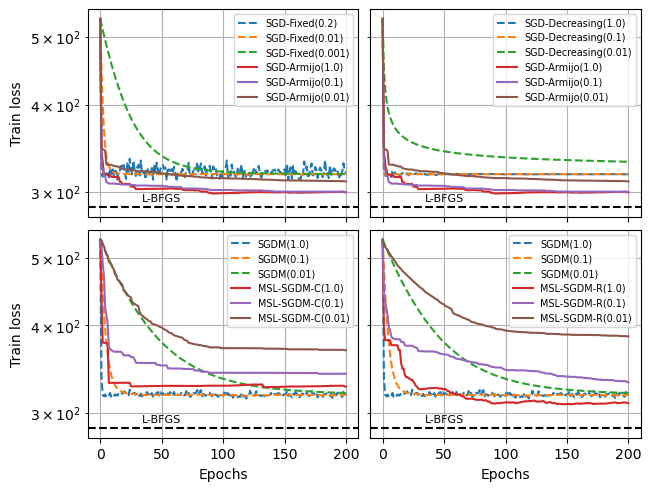

In [95]:
diagnostic(optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslcDiab1, mslcDiab2, mslcDiab3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslrDiab1, mslrDiab2, mslrDiab3]),
           benchDiab1)

# Apple, Loan, HR, Bank, Heart, Diabetes

Text(0.5, 0, 'Epochs')

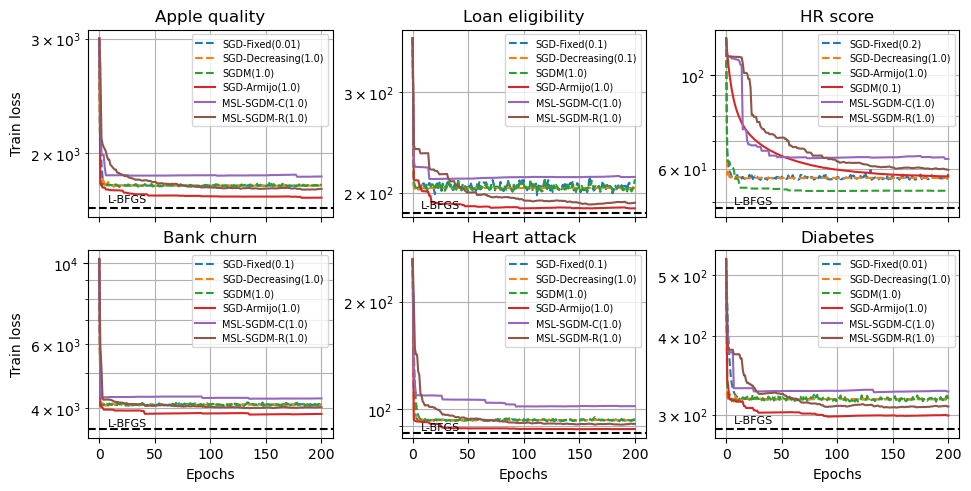

In [100]:
datasets1 = ["Apple quality", "Loan eligibility", "HR score", "Bank churn", "Heart attack", "Diabetes"]
models1 = [optim_data([sgdApple_fixed3, sgdApple_decre1, sgdmApple1, sgdApple_armijo1, mslcApple1, mslrApple1]),
           optim_data([sgdLoan_fixed2, sgdLoan_decre2, sgdmLoan_1, sgdLoan_armijo1, mslcLoan1, mslrLoan1]),
           optim_data([sgdHR_fixed1, sgdHR_decre1, sgdHR_armijo1, sgdmHR1, mslcHR1, mslrHR1]),
           optim_data([sgdBank_fixed2, sgdBank_decre1, sgdmBank1, sgdBank_armijo1, mslcBank1, mslrBank1]),
           optim_data([sgdHeart_fixed2, sgdHeart_decre1, sgdmHeart1, sgdHeart_armijo1, mslcHeart1, mslrHeart1]),
           optim_data([sgdDiab_fixed2, sgdDiab_decre1, sgdmDiab1, sgdDiab_armijo1, mslcDiab1, mslrDiab1])]

bench1 = [benchApple1, benchLoan1, benchHR1, benchBank1, benchHeart1, benchDiab1]

fig, axs = plt.subplots(2, 3, layout="constrained", sharex=True, figsize=(6.4*1.5, 4.8))
i = 0
for ax, name in zip(axs.flat, datasets1):
    plot_loss(ax, models1[i])

    ax.axhline(y=bench1[i].loss, color="k", linestyle="dashed")
    ax.text(25, bench1[i].loss*1.02, bench1[i].solver, fontsize=8, ha="center")

    ax.set_title(name)
    ax.set_yscale("log")
    i += 1
    if i == len(models1):
        break
axs[0,0].set_ylabel("Train loss")
axs[1,0].set_ylabel("Train loss")
axs[1,0].set_xlabel("Epochs")
axs[1,1].set_xlabel("Epochs")
axs[1,2].set_xlabel("Epochs")